In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
!pip install pdvega

  Running setup.py bdist_wheel for pdvega: started
  Running setup.py bdist_wheel for pdvega: finished with status 'done'
  Stored in directory: C:\Users\Kyungyk\AppData\Local\pip\Cache\wheels\64\67\6c\3faafbf516d2bdfab7b3efc6e5db7dcf8dce060ea9da8fbe62
  Running setup.py bdist_wheel for vega3: started
  Running setup.py bdist_wheel for vega3: finished with status 'done'
  Stored in directory: C:\Users\Kyungyk\AppData\Local\pip\Cache\wheels\bb\d1\fa\c1f13e071650f6dd9c6b986b7ee4d19dbfc7bc32a902593d39
Successfully built pdvega vega3


In [4]:
import pdvega

In [8]:
data1= sns.load_dataset('tips') #이게 안되면 pd.read_csv('https:// 깃허브 주소 ') 이렇게 가져와도됨.

In [9]:
data1.info() # data1: seaborn 의 경우 category 로 다 바뀌어있다. 하지만 직접 받아온경우 object 형이다 따라서 astype 으로 바꾼다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [12]:
data2 =  pd.read_csv('tips.csv')

In [60]:
data3 = pd.read_csv('https://github.com/mwaskom/seaborn-data/blob/master/tips.csv',error_bad_lines=False) #원래 이걸로 되야하는데 안되서 저 주소가서 다운받음 나잘함?헤헤헤호호히힣

b'Skipping line 72: expected 1 fields, saw 8\nSkipping line 123: expected 1 fields, saw 3\nSkipping line 133: expected 1 fields, saw 3\nSkipping line 137: expected 1 fields, saw 3\nSkipping line 142: expected 1 fields, saw 3\nSkipping line 147: expected 1 fields, saw 3\nSkipping line 151: expected 1 fields, saw 3\nSkipping line 171: expected 1 fields, saw 2\nSkipping line 237: expected 1 fields, saw 3\nSkipping line 239: expected 1 fields, saw 3\nSkipping line 385: expected 1 fields, saw 3\nSkipping line 389: expected 1 fields, saw 3\nSkipping line 390: expected 1 fields, saw 3\nSkipping line 486: expected 1 fields, saw 2\nSkipping line 3038: expected 1 fields, saw 2\nSkipping line 3039: expected 1 fields, saw 3\nSkipping line 3040: expected 1 fields, saw 3\nSkipping line 3041: expected 1 fields, saw 3\nSkipping line 3042: expected 1 fields, saw 3\nSkipping line 3043: expected 1 fields, saw 3\nSkipping line 3050: expected 1 fields, saw 3\nSkipping line 3051: expected 1 fields, saw 3\nS

In [61]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 1 columns):
<!DOCTYPE html>    2904 non-null object
dtypes: object(1)
memory usage: 22.8+ KB


In [13]:
data2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [16]:
data2.sex = data2.sex.astype('category')

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 11.8+ KB


In [24]:
data2.sex = data2.sex.astype('category')
data2.smoker = data2.smoker.astype('category')
data2.day = data2.day.astype('category')
data2.time = data2.time.astype('category')

In [25]:
data2.info() #object 를 category 로 다바꿔줌 cat.함수 적용을위해서 str. 과 비슷함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


# 담배피는사람 or 담배안피는사람이 팁을 많이 줄까? 이것을 알아보자

In [28]:
data2.groupby('smoker').mean()

,total_bill,tip,size
smoker,,,
No,19.188278,2.991854,2.668874
Yes,20.756344,3.008710,2.408602


In [29]:
#data2.groupby('smoker').mean() 이게 데이터 테이블이니까 .tip 하면 시리즈로 나온다

In [30]:
data2.groupby('smoker').mean().tip

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [39]:
data2.groupby(['smoker','sex']).mean()

total_bill       tip      size
smoker sex                                   
No     Female   18.105185  2.773519  2.592593
       Male     19.791237  3.113402  2.711340
Yes    Female   17.977879  2.931515  2.242424
       Male     22.284500  3.051167  2.500000

# 다시보니까 담배 안피는 남자가 많이주네 , 분석의 범위 따라서 의미가 다르게 나옴 >> 통계값으로 장난친다.

In [40]:
#범위를 어디로 잡는가 인가 중요하다 , group by 썻으니까 pivot_table 써보자

In [46]:
pd.pivot_table(data2,values='tip',index="smoker") # pd.pivot_table()의경우 첫번쨰 인자가 데이터프레임
#데이터 프레임.pivot_table() 쓰면 인자가 달라짐. 

,tip
smoker,
No,2.991854
Yes,3.008710


In [48]:
# 성별까지하고싶으면
pd.pivot_table(data2,values='tip',index=["smoker",'sex']) # pd.pivot_table()의경우 첫번쨰 인자가 데이터프레임
#데이터 프레임.pivot_table() 쓰면 인자가 달라짐. 

tip
smoker sex             
No     Female  2.773519
       Male    3.113402
Yes    Female  2.931515
       Male    3.051167

In [50]:
# values :  어떤값 보고싶다? tip 값, 어떤기준으로 smoker과 성별 , pivot table 은 엑셀에 익숙한사람들이 쓴다. group by 는 이해가 잘안되서

In [52]:
graph  = pd.pivot_table(data2,values='tip',index="sex") 

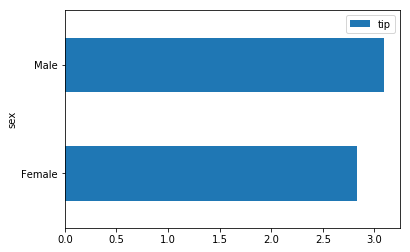

In [54]:
graph.plot(kind='barh')
#graph.plot.barh() #같은방식

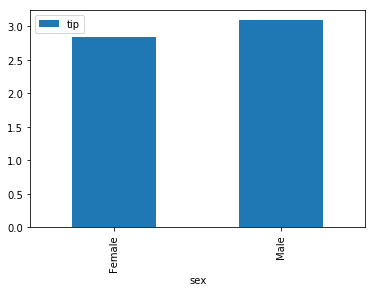

In [58]:
graph.plot.bar()

In [62]:
import matplotlib.pyplot as plt

In [63]:
plt.style.available #이용할 수 있는 스타일

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [76]:
plt.style.use("ggplot") # ggplot 하고 스타일이 비슷하게 나온다 .

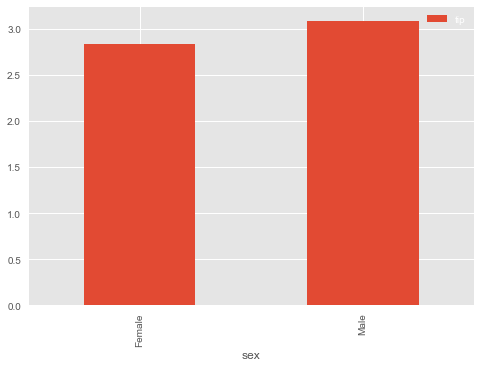

In [77]:
graph.plot.bar()

In [67]:
# visualization 에서 내가 좋아하는 스타일 찾는것. 세련된 색감 ggplot,  ggplot 으로 그린줄안다  ,실제로 ggplot 쓴건아닌데

In [78]:
%matplotlib notebook #허접한 인터렉티브 기능이 추가됨.

<IPython.core.display.Javascript object>


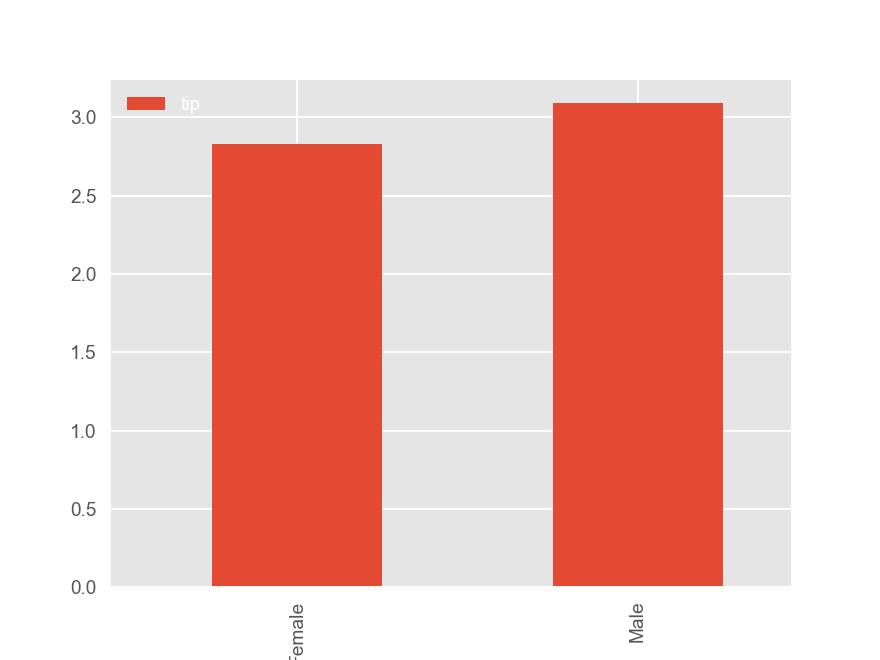

In [79]:
graph.plot.bar()

In [80]:
%matplotlib inline #인터렉티브 기능 사라짐.끄기

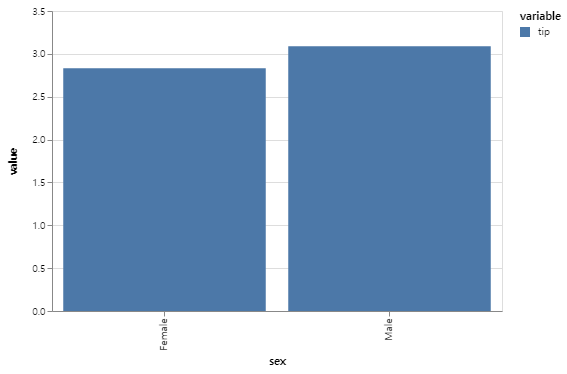

In [81]:
graph.vgplot.bar() # vega 는 또다른 아름다움. 약간 미묘함 그냥 판다스 쓰는사람거의없다 성의없어보여서 ,두세줄만 고쳐도되는데 .

In [82]:
#파이썬에서 막강하다,
# pdvega는 파이썬의 plot 에서 vgplot 을 대체해서 모양을 바꿔준다. 


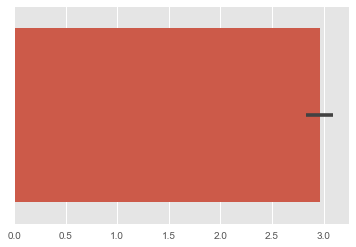

In [83]:
sns.barplot(graph)

In [84]:
# 통계값이 추가됨 - 검정 -> 오차범위

seaborn 도 matplot 의 기본이 기때문에 ggplot 의 테마가 적용되었다?

In [85]:
graph #1차원.

,tip
sex,
Female,2.833448
Male,3.089618


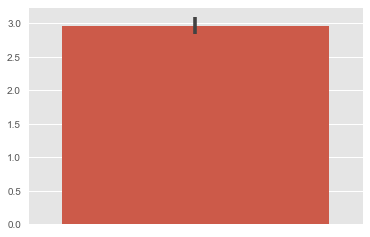

In [88]:
sns.barplot(graph,orient='v') #인터렉티브 안된다 .

In [89]:
graph.T #transpose

sex,Female,Male
tip,2.833448,3.089618


1차원이라서 Transpose 해도 쓸모가 없다.  >> 이해안됨

------------------------------------------

# 요일별 팁을 어떻게 줄까 그래프그리기

In [97]:
data2.groupby('day').tip.mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [98]:
graph  = pd.pivot_table(data2,values='tip',index="day") 

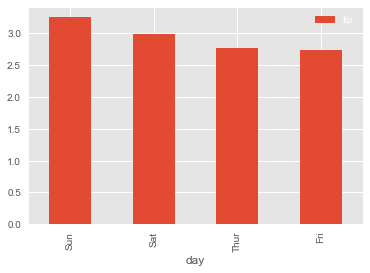

In [100]:
graph.plot.bar()

In [101]:
iris = sns.load_dataset('iris')

In [102]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [103]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [106]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


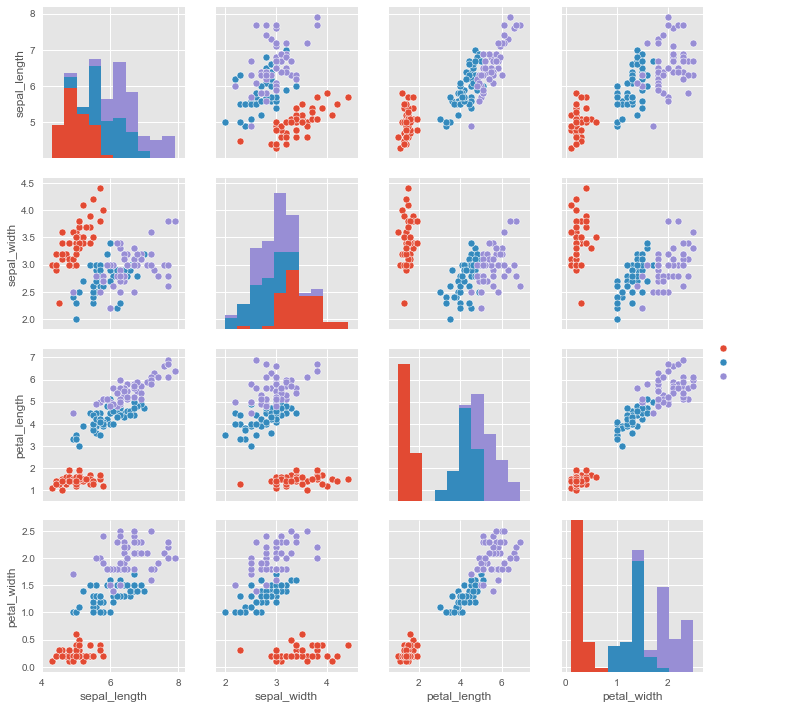

In [108]:
#상간관꼐를 볼떄 
sns.pairplot(iris,hue="species")

통계치 봤을때 두개의 상간계수를 보았다.  어느게 더 우아한가? hue =species 하니까 종류별로 색깔이 다 나온다

matplotlib을 
빠르게 그릴수있다 : pandas  
    빠르며 통계값쓴다 : seaborn. 
        ggplot: 은 R 에서 배웠다
    인터렉티브 기능이없다.따라서 웹시스템에서 이쁘게 보이려면 plotlib, bokeh ,vega 
    vega는 pdvega 이상 쓸필요없다 vega 문법이 또 따로 있으니까 .
    https://bokeh.pydata.org/en/latest/
    
    visualizaiton 은 이뻐야한다 . 
    gallery , 웹기반. 
    flask , bokeh 하고 연결해서 , 최종적으로 만들것은 그래프와 이런것을 ,옵션해서 입력받는다 결과를 딱 보여준다 . 
    첫번째 표를 보여주고 , 그래프 탭마다 딱 보여주면 발표할때
    bokeh 를 만들것이다.
    